In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
"""island = remove
Island_id = remove
kb_id = remove 
bag_id  = remove
Sex m = 1, f = 0
Gravid 1, 0, -1
Morph
- if not o,y,w remove
- y, o, w = 2, 1, 0
j= remove
Scars, ticks, mites
If n/a = 0
Substrate type 
Grass = leaves, shrub, wall = stonewall, tree = branch, rock, cement=ground=dirt, e5 = (6, 5, 4, 3, 2, 1, 0)"""
strings = ["cement, ground, and dirt", "rocks", "trees and branches", "stone walls and walls", "leaves, shrubs, and grass"]
removed_columns = ["gravid", "morph", "island", "island_id", "kb_id", "bag_id", "capture_temp", "substrate_temp", "time_of_capture", 'scars', 'ticks', 'mites', 'autotomy']
data = pd.read_csv('please_work.csv')
variables_to_test = ['total % veg cover', '% RHumidity', 'Air temp', '% shrub cover', '% herbaceous veg', '% tree cover']
data
data = data.drop(removed_columns, axis=1)
data = data.dropna()

In [3]:
data

,sex,mass,svl,head_length,head_width,head_depth,bicep_length,forearm_length,hand_finger_length,femur_length,tibia_length,toe,total % veg cover,% RHumidity,Air temp,% shrub cover,% herbaceous veg,% tree cover
4,m,8.1,63.54,17.30,9.49,7.92,6.55,6.58,8.00,12.79,10.64,16.83,10.0,40.0,18.1,0.0,10.0,0.0
5,m,5.8,64.69,15.54,8.12,6.66,6.91,6.76,7.98,9.88,10.16,15.59,12.0,42.8,17.6,2.0,10.0,0.0
6,m,6.1,65.75,17.97,9.09,7.64,6.90,7.34,8.52,14.50,11.11,17.96,90.0,39.8,20.9,0.0,80.0,10.0
7,f,6.3,66.87,15.87,8.22,7.16,6.12,5.98,7.21,10.62,8.91,14.97,80.0,33.0,22.5,20.0,60.0,0.0
8,m,7.8,63.48,15.07,7.83,6.55,5.94,6.11,7.22,10.36,9.83,14.47,60.0,35.8,20.0,0.0,60.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,f,5.1,60.05,15.58,7.47,5.79,7.00,6.76,8.03,12.20,9.97,17.59,20.0,41.3,32.0,0.0,20.0,0.0
208,m,8.2,77.04,17.85,9.07,6.24,6.92,7.18,9.67,15.20,11.55,18.18,50.0,42.0,34.0,0.0,30.0,20.0
209,m,8.6,66.79,18.03,10.49,7.46,7.79,7.70,9.57,14.67,12.85,21.03,60.0,47.3,31.8,10.0,50.0,0.0
211,m,8.8,68.69,19.51,10.38,7.66,7.57,7.40,11.08,14.71,13.08,20.26,40.0,40.5,32.8,0.0,40.0,0.0


In [24]:
# data['scars'] = data['scars'].astype('int')
# data['ticks'] = data['ticks'].astype('int')
# data['mites'] = data['mites'].astype('int')

In [9]:
transposed_processed_matrix = []
for var in data:
    col = data[var]
    to_append = []
    if var == "sex":
        for x in col:
            if x == 'm':
                to_append.append(1)
            else:
                to_append.append(0)
    elif var == "gravid":
        for x in col:
            if x == 'y':
                to_append.append(1)
            elif x == "n":
                to_append.append(0)
            else:
                to_append.append(-1)
    elif var == "morph":
        allowed = ['y', 'o', 'w']
        for x in col:
            if x == 'y':
                to_append.append(2)
            elif x == 'o':
                to_append.append(1)
            elif x == 'w':
                to_append.append(0)
            else:
                to_append.append('')
    elif var == "total % veg cover":
        for x in col:
            to_append.append(x/100)
    if len(to_append) > 0:
        transposed_processed_matrix.append(np.array(to_append))
    else:
        transposed_processed_matrix.append(np.array(col))


In [11]:
sex = np.array(transposed_processed_matrix[0]).T
print(sex)
print(np.array(transposed_processed_matrix).shape)

[1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1
 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0]
(18, 130)


In [12]:
transposed_processed_matrix = np.array(transposed_processed_matrix[1:]).T
print(np.shape(transposed_processed_matrix))

(130, 17)


In [15]:
print(transposed_processed_matrix)
print(np.shape(transposed_processed_matrix))

[[ 8.1  63.54 17.3  ...  0.   10.    0.  ]
 [ 5.8  64.69 15.54 ...  2.   10.    0.  ]
 [ 6.1  65.75 17.97 ...  0.   80.   10.  ]
 ...
 [ 8.6  66.79 18.03 ... 10.   50.    0.  ]
 [ 8.8  68.69 19.51 ...  0.   40.    0.  ]
 [ 7.8  74.87 17.6  ...  5.   30.    0.  ]]
(130, 17)


In [16]:
final_transponsed_matrix = []
for row in transposed_processed_matrix:
    if not '' in row:
        final_transponsed_matrix.append(row)
print(np.shape(final_transponsed_matrix))

(130, 17)


<ipython-input-16-c611364e5f71>:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if not '' in row:


In [19]:
B = np.array(final_transponsed_matrix, dtype=float)
without_last = B[:, 0:11]

In [20]:
pca = PCA(n_components=3)
pca.fit(without_last)
print(pca.explained_variance_ratio_)
total_var = 0
for x in pca.explained_variance_ratio_:
    total_var += x
    print(total_var)

[0.71274601 0.14878709 0.06641562]
0.7127460144565947
0.8615331038108307
0.9279487248628632


In [21]:
eigenvectors = pca.components_.T
without_last
proj = np.dot(without_last, eigenvectors)
evaluation_vectors = []
for i in range(11, 17):
    last = B[:, i:i+1]
    evaluation_vectors.append(last)
# print(np.shape(last))
print(proj.shape)
print(np.shape(proj))
print(np.shape(evaluation_vectors))

(130, 3)
(130, 3)
(6, 130, 1)


In [116]:
# colors_array = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [22]:
colors_array = ['#ad760e', '#a2e408', '#1fbc35', '#055a25', '#055a25']

In [26]:
characters = []
markers = ['o', '^']
for x in sex:
    if x == 1:
        characters.append(markers[0])
    else:
        characters.append(markers[1])

In [27]:
color_vectors = []
veg_color_vector = [int(color * 100 //25) for color in evaluation_vectors[0]]
color_vectors.append(veg_color_vector)


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.spatial as sp

# Generate random 3D data
points = (proj[:, 0], proj[:, 1], proj[:, 2])
# Compute the convex hull of the data
hull = sp.ConvexHull(points)

# Create a 3D figure and axis object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D scatterplot of the points
ax.scatter(points[:,0], points[:,1], points[:,2], c='b', marker='o')

# Plot the convex hull as a surface
for simplex in hull.simplices:
    poly = plt.Polygon(points[simplex], alpha=0.2)
    ax.add_patch(poly)

# Set the labels of the axes
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Show the plot
plt.show()


(130,)


QhullError: QH6214 qhull input error: not enough points(3) to construct initial simplex (need 131)

While executing:  | qhull i Qx Qt
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 756879890  incidence  Qxact-merge  Qtriangulate  _zero-centrum
  Q3-no-merge-vertices-dim-high  _maxoutside  0


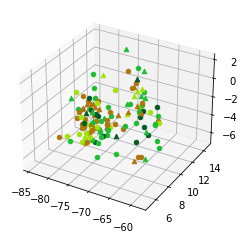

In [28]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the scatterplot
for oh, color, char in zip(proj, color_vectors[0], characters):
        # plt.title(strings[int(color)])
        rep = 0
        if char == '^':
                rep = 1
        ax.scatter(xs=oh[0], ys=oh[1], zs=oh[2], c=colors_array[color], marker=char)

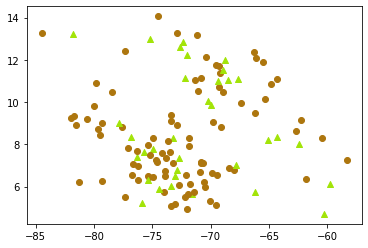

In [141]:
arrays = [[] for i in range(3)]
for oh, color, char in zip(proj, color_vectors[0], characters):
        # plt.title(strings[int(color)])
        rep = 0
        if char == '^':
                rep = 1
        plt.scatter(x=oh[0], y=oh[1], c=colors_array[rep], marker=char)
        # arrays[int(color)].extend(oh)
        # title = str(int(color)) + '.pdf'
        # plt.savefig('line_plot.pdf')  
        # plt.legend(["0", '1', '2', '3', '4', '5', '6'])


In [36]:
print(np.shape(proj[:, 0]))

(125,)


[ 7.93612638 11.13878302  8.35831136  6.78355186  6.37330554  4.93735183
  4.70316181  7.06281387 10.53483244 14.06298261  6.49449965  6.30897155
  8.79593804  9.0042782   8.33172282  9.00104558  9.46356652  9.06144672
  7.37097136  7.75846246 11.90240031  6.96484158  6.33202564  6.03819569
  5.90572148 10.49752852  6.88818137  8.27785055 12.61357366  7.9790523
  7.1515733   9.82152249  7.70202738  6.0795336   6.09869046  6.62313976
 10.05283778  7.32748657  9.17438252  7.15298041  8.73864441  8.19943
  7.12050977  6.19796345  9.24323067  5.19058487  6.99714586]
[ 7.25851945 12.82530802  6.66802331  5.76098772  8.28269444 10.15885811
  7.41383755  6.49829172  6.4380924   5.73738055 12.06449264  7.6107691
 10.49146532 11.37679822]
[11.72193667  8.29782824  6.51962692 11.03209451 13.19718556  5.66856163
  6.23087591  5.62698663  9.97172176 12.37372915  6.10333789  6.77876895
  7.10482197 10.89689599  7.24179684 11.08477259 13.25175365 12.96893913
  9.08345713  9.15531446  5.2076472   8.2

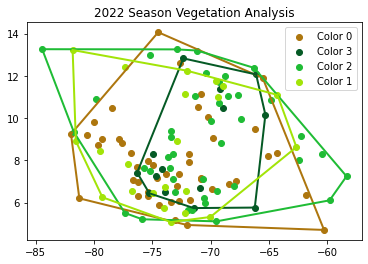

In [135]:
import matplotlib.patches as patches
from scipy.spatial import ConvexHull
# Find the indices of points with each color
color_dict = {}
for i, color in enumerate(color_vectors[0]):
    if color not in color_dict:
        color_dict[color] = []
    color_dict[color].append(i)
x = proj[:, 0]
y = proj[:, 1]

fig, ax = plt.subplots()
for color, indices in color_dict.items():
    ax.scatter(x[indices], y[indices], c=colors_array[color], label=f"Color {color}")
ax.legend()
plt.title("2022 Season Vegetation Analysis")
for color, indices in color_dict.items():
    # Extract the x and y coordinates of the points with the same color
    x_color = proj[:, 0][indices]
    y_color = proj[:, 1][indices]
    # Calculate the vertices of the outer polygon using the Convex Hull algorithm
    print(y_color)
    points = np.column_stack((x_color, y_color))
    hull = ConvexHull(points)
    outer_points = points[hull.vertices]
    polygon = patches.Polygon(outer_points, linewidth=2, edgecolor=colors_array[color], facecolor='none')
    ax.add_patch(polygon)

# Show the plot
plt.savefig("vegetation cover and traits 2d.pdf")
plt.show()

In [70]:
from scipy import stats

In [81]:
for i in range(len(arrays)):
    for j in range(len(arrays)):
        if i < j:
            p = stats.ttest_ind(arrays[i], arrays[j]).pvalue
            if p < 0.1:
                print(strings[i], "||", strings[j]) 
                print(p)

rocks || trees and branches
0.018164050089947984
rocks || leaves, shrubs, and grass
0.01881736763756313
